# Explore suite2p output
## load data


In [116]:
import numpy as np
import pandas as pd
#import suite2p
from scipy import io
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
file_path = Path('../../data/processed/suite2p/plane0/Fall.mat')
assert file_path.exists()
file_path


WindowsPath('../../data/processed/suite2p/plane0/Fall.mat')

In [19]:
mat = io.loadmat(file_path)


In [26]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'stat', 'ops', 'F', 'Fneu', 'spks', 'iscell', 'redcell'])

In [28]:
f = mat['F']
f.shape

(449, 2250)

## visualization of data

In [35]:
iscell = mat['iscell']
sum(iscell[:,0])


178.0

In [56]:
cell_f = f[np.where(iscell[:,0]==1),:]
cell_f = cell_f[0]
cell_f.shape

(178, 2250)

In [60]:
cell4 = cell_f[3,:]
cell10 = cell_f[9,:]
time = np.arange(2250)

Text(0, 0.5, 'f level')

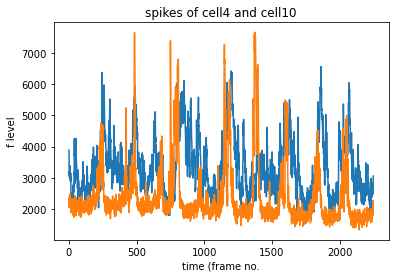

In [62]:
plt.plot(time,cell4)
plt.plot(time, cell10)
plt.title('spikes of cell4 and cell10')
plt.xlabel('time (frame no.)')
plt.ylabel('f level')

## Comparing cell activity to noise

In [63]:
fneu = mat['Fneu']
fneu.shape

(449, 2250)

In [64]:
cell_fneu = fneu[np.where(iscell[:,0]==1),:]
cell_fneu = cell_fneu[0]
cell_fneu.shape

(178, 2250)

In [67]:
cell10_Neu = cell_fneu[9,:]

Text(0, 0.5, 'f level')

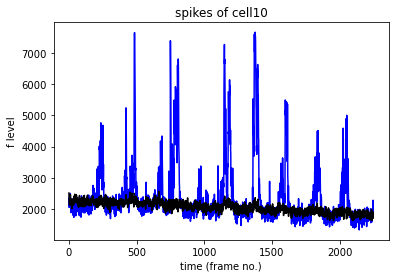

In [68]:
plt.plot(time,cell10,'b')
plt.plot(time, cell10_Neu,'k')
plt.title('spikes of cell10')
plt.xlabel('time (frame no.)')
plt.ylabel('f level')

In [72]:
mat['redcell'].shape

(449, 2)

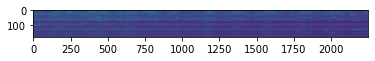

In [74]:
plt.imshow(cell_f)


In [84]:
max_cell = np.amax(cell_f, 1)
#cell_f./max_cell
max_cell.shape

(178,)

In [82]:
cell_f.shape

(178, 2250)

In [85]:
cell_f/max_cell

ValueError: operands could not be broadcast together with shapes (178,2250) (178,) 

In [89]:
normalized_spikes = (cell_f.T/max_cell).T

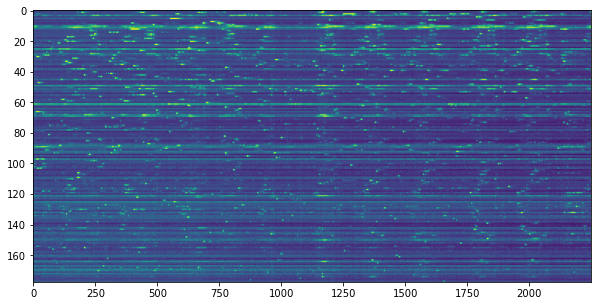

In [104]:
plt.figure(figsize=(10,5))
plt.imshow(normalized_spikes, aspect='auto')

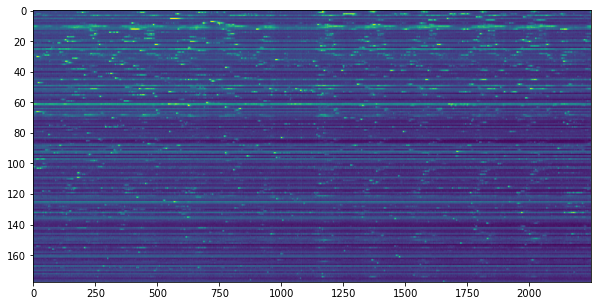

In [106]:
plt.figure(figsize=(10,5))
plt.imshow(cell_f, aspect='auto')

Text(0, 0.5, 'f level')

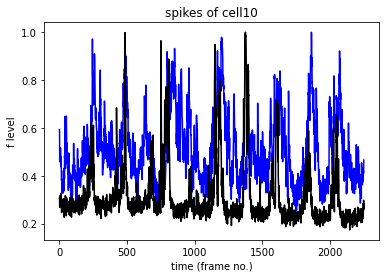

In [108]:
plt.plot(time,normalized_spikes[3,:],'b')
plt.plot(time, normalized_spikes[9,:],'k')
plt.title('spikes of cell10')
plt.xlabel('time (frame no.)')
plt.ylabel('f level')

In [114]:
spikes_all = mat['spks']
spikes_cells = spikes_all[np.where(iscell[:,0]==1),:]
spikes_cells = spikes_cells[0]
spikes_cells.shape

(178, 2250)

Text(0, 0.5, 'f level')

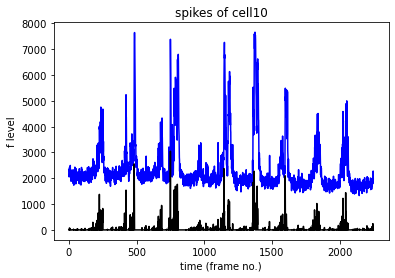

In [115]:
plt.plot(time,cell_f[9,:],'b')
plt.plot(time, spikes_cells[9,:],'k')
plt.title('spikes of cell10')
plt.xlabel('time (frame no.)')
plt.ylabel('f level')

## stats

we wnt: plot cells based on cluster 

In [120]:
c_n = 10
clusters = KMeans(n_clusters=c_n).fit(spikes_cells)
labels = clusters.labels_
labels.shape

(178,)

In [127]:
cluster3 = spikes_cells[np.where(labels==3)]
cluster3.shape

(164, 2250)

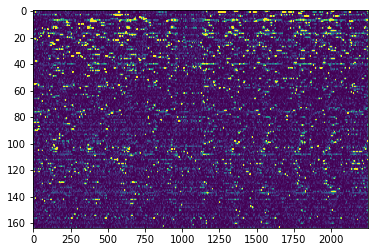

In [130]:
plt.imshow(cluster3, aspect = 'auto',vmin = 0,vmax = 200)

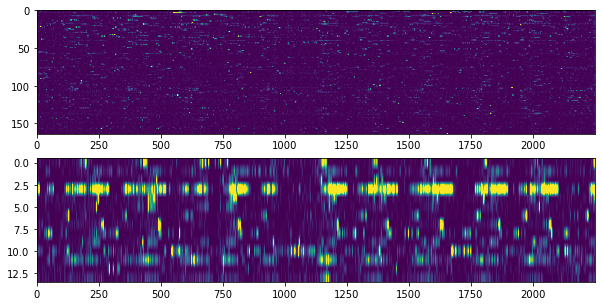

In [136]:
clusternot3 = spikes_cells[np.where(labels!=3)]
plt.figure(figsize=(10,5))
plt.subplot(2,1,1) 
plt.imshow(cluster3, aspect = 'auto',vmin = 0,vmax = 1000)
plt.subplot(2,1,2) 
plt.imshow(clusternot3, aspect = 'auto',vmin = 0,vmax = 1000)

In [ ]:
mat['stats']